# Przetwarzanie Grafiki i Muzyki - laboratorium nr 5

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Zadanie 1 (2 punkty)

Proszę narysować histogramy dla obrazków "LENA_512.jpg" oraz "Statek_640_505.jpg":

  * Narysuj histogram oddzielnie dla R, G, B
  * Narysuj histogram dla szarego zdjęcia

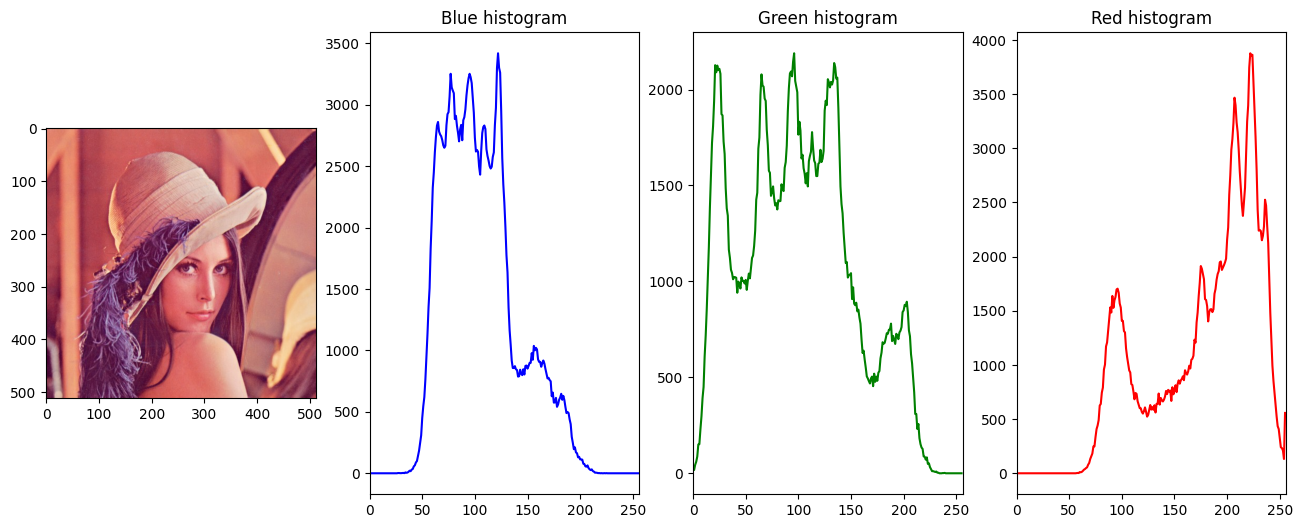

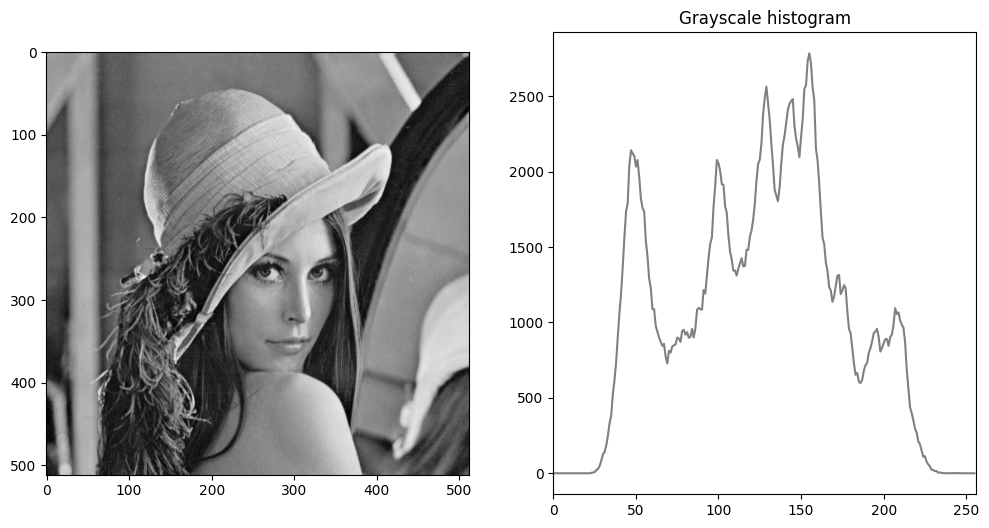

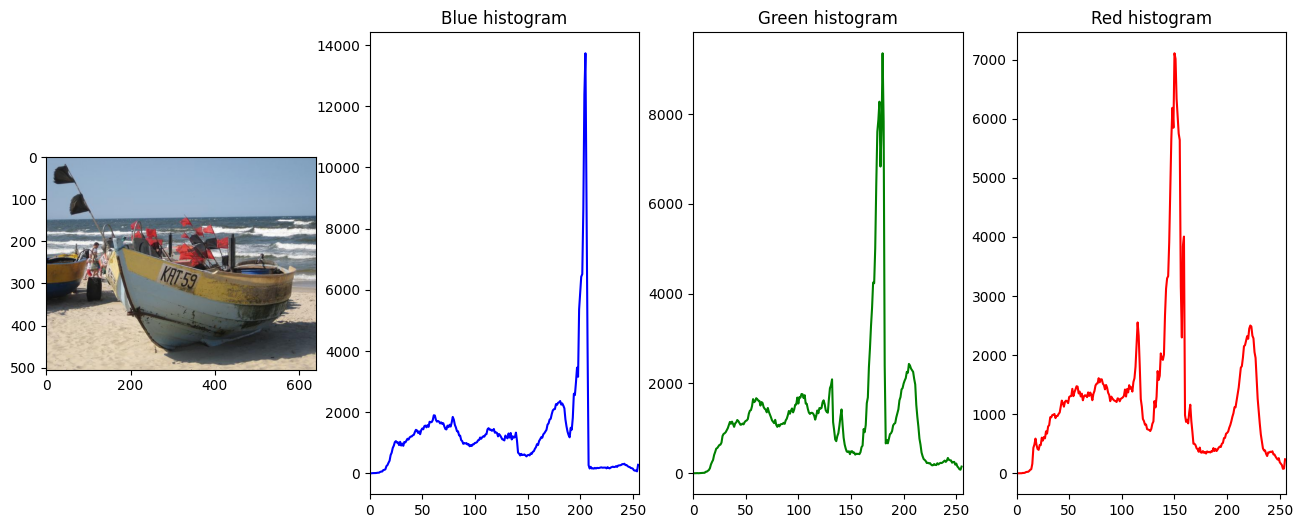

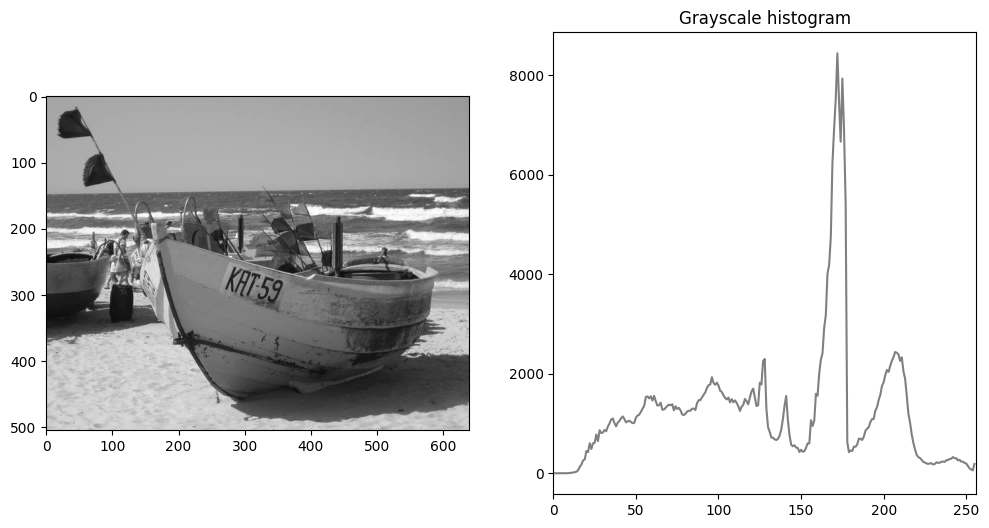

In [7]:
def color_histogram(image):
    hist_B = cv2.calcHist([image],[0],None,[256],[0,256])
    hist_G = cv2.calcHist([image],[1],None,[256],[0,256])
    hist_R = cv2.calcHist([image],[2],None,[256],[0,256])
    
    plt.figure(figsize=(16, 6))
    plt.subplot(141)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    plt.subplot(142)
    plt.plot(hist_B, color='b')
    plt.title("Blue histogram")
    plt.xlim([0, 256])
    
    plt.subplot(143)
    plt.plot(hist_G, color='g')
    plt.xlim([0, 256])
    plt.title("Green histogram")
    
    plt.subplot(144)
    plt.plot(hist_R, color='r')
    plt.xlim([0, 256])
    plt.title("Red histogram")
    
    plt.show()
    

def grayscale_histogram(image):
    hist_grayscale = cv2.calcHist([image],[0],None,[256],[0,256])

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(image, 'gray')
    
    plt.subplot(122)
    plt.plot(hist_grayscale, color='gray')
    plt.title("Grayscale histogram")
    plt.xlim([0, 256])
    
    plt.show()
    
    
lena = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_COLOR)
lena_gray = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)

ship = cv2.imread("./img/statek_640_505.jpg", cv2.IMREAD_COLOR)
ship_gray = cv2.imread("./img/statek_640_505.jpg", cv2.IMREAD_GRAYSCALE)

color_histogram(lena)
grayscale_histogram(lena_gray)

color_histogram(ship)
grayscale_histogram(ship_gray)


# Zadanie 2 (2 punkty)

Proszę zaimplementować funkcję zmiany kontrastu obrazu.

Wykorzystaj tablicę LUT:

$$
LUT(i) = \left\{ \begin{array}{ll}
0 & \textrm{gdy } a \left(i - \frac{i_{max}}{2} \right)+\frac{i_{max}}{2}<0\\
a \left(i - \frac{i_{max}}{2} \right)+ \frac{i_{max}}{2} & \textrm{gdy } 0 \leq a \left( i - \frac{i_{max}}{2} \right) + \frac{i_{max}}{2} \leq i_{max} \\
i_{max} & \textrm{gdy } a \left( i - \frac{i_{max}}{2} \right)+ \frac{i_{max}}{2}>i_{max} 
\end{array} \right.
$$


Parametr
  * $a<1$ - zmniejszenie kontrastu,
  * $a=1$ - identyczność,
  * $a>1$ - zwiększenie kontrastu.

Uwagi:

  * Proszę zastosować napisaną funkcję do zdjęcia "LENA_512.jpg" i wykonać ją na luminancji (składowa Y z formatu YCbCr) dla $a\in\{0.5, 1, 1.5\}$, a następnie wyświetlić w formacie RGB z uwzględnieniem kanałów Cb i Cr (po zrobieniu konwersji z YCbCr na RGB).
  * Porównaj histogramy przed i po ściemnieniu.

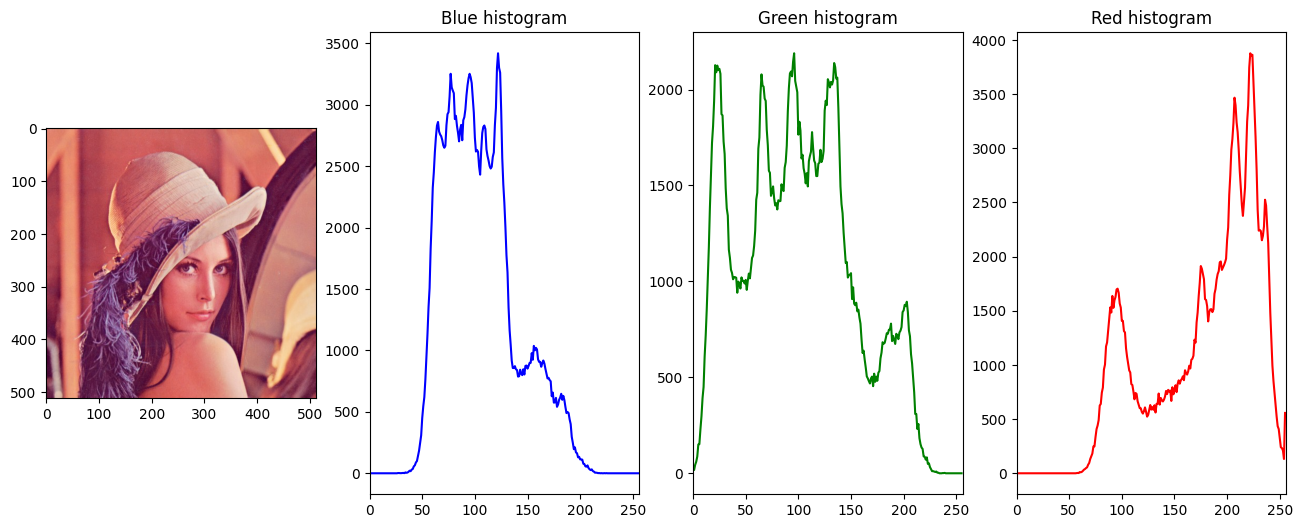

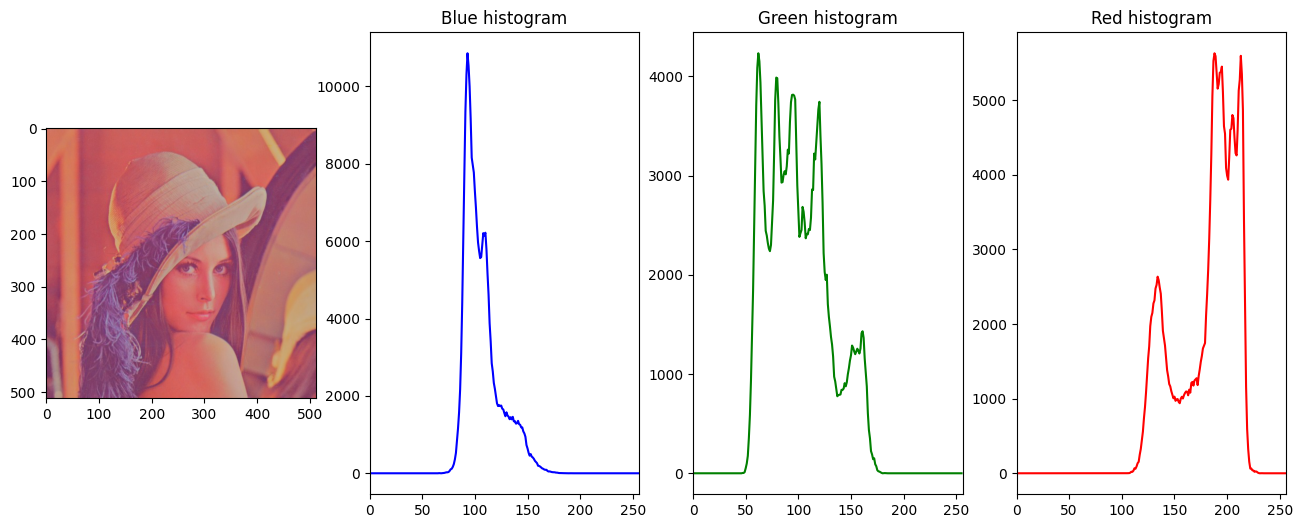

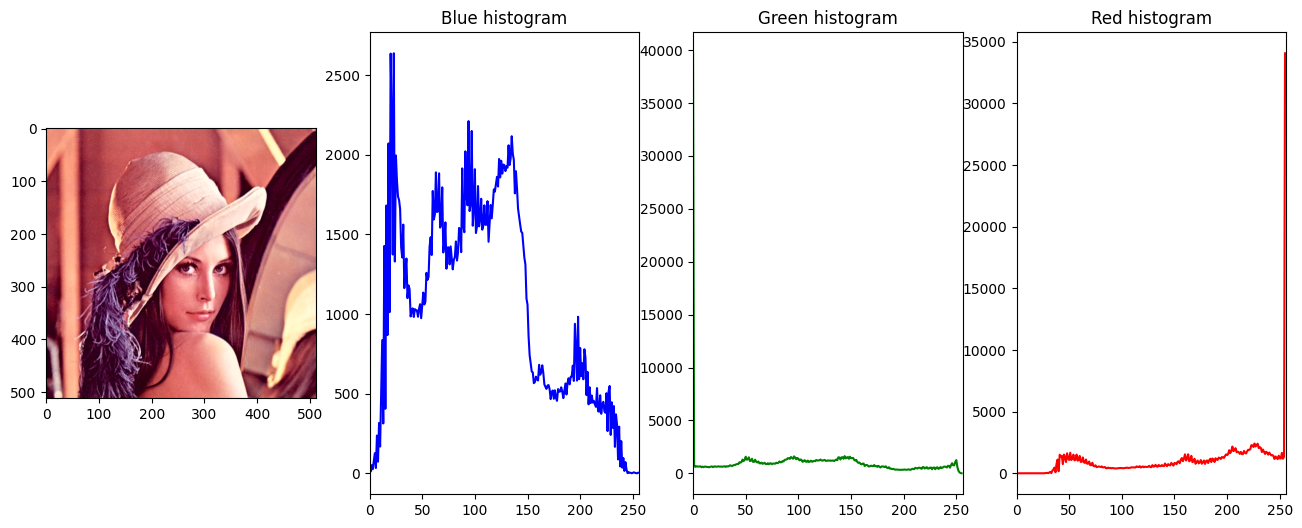

In [8]:
def lut_contrast(i, a, i_max) -> float:
    value = a * (i - (i_max / 2)) + (i_max / 2)
    return np.clip(value, 0, i_max)

def change_image_contrast(image, a: float):
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    Y = ycbcr_image[:,:,0]
    # i_max = np.max(Y)
    i_max = 255
    Y = lut_contrast(Y, a, i_max)
    ycbcr_image[:,:,0] = Y
    
    return cv2.cvtColor(ycbcr_image, cv2.COLOR_YCrCb2BGR)


lena = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_COLOR)
darkened_lena = change_image_contrast(lena, a=0.5)
brightened_lena = change_image_contrast(lena, a=1.5)

color_histogram(lena)
color_histogram(darkened_lena)
color_histogram(brightened_lena)

cv2.imshow("lena", lena)
cv2.imshow("darkened lena, a = 0.5", darkened_lena)
cv2.imshow("brightened lena, a = 1.5", brightened_lena)

cv2.waitKey(50)
cv2.destroyAllWindows()

## Rozciągnięcie histogramu

## Zadanie 3 (2 punkty)

Proszę zaimplementować funkcję rozciągającą histogram.

Wykorzystaj tablicę LUT:

$$ 
LUT(i)= \frac{i_{max} }{ {v_{max} - v_{min}} } \cdot (i - v_{min})
$$

Parametr:

  * $v_{max}$ oznacza maksymalną wartość składowej w obrazie,
  * $v_{min}$ oznacza minimalną wartość składowej w obrazie,
  * $i_{max}$ oznacza maksymalną możliwą wartość składowej w obrazie.

Uwagi:

  * Proszę zastosować do zdjęcia LENA_512. Proszę wykonać na Luminancji (składowa Y z formatu YCbCr) a następnie wyświetlić w formacie RGB z uwzględnieniem kanałów Cb i Cr.
  * Porównaj histogramy przed i po wyrównaniu.



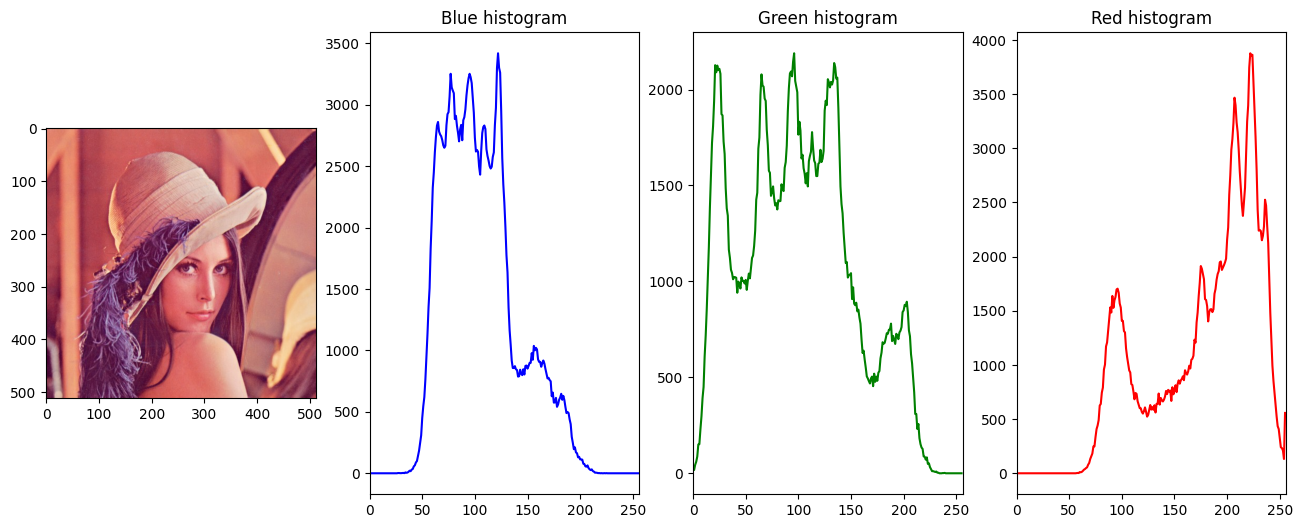

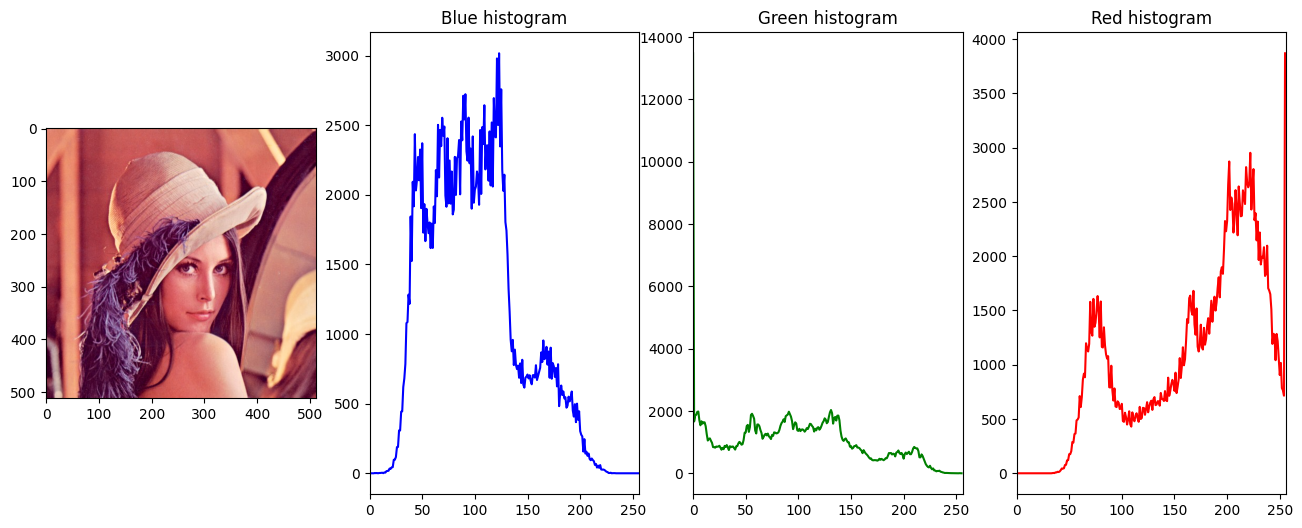

In [9]:
def lut_histogram_stretching(i, v_max, v_min, i_max):
    return (i_max / (v_max - v_min)) * (i - v_min)

def stretch_image_histogram(image):
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    Y = ycbcr_image[:,:,0]
    i_max = 255
    v_max = np.max(Y)
    v_min = np.min(Y)
    Y = lut_histogram_stretching(Y, v_max, v_min, i_max)
    Y = Y.astype(np.uint8)
    ycbcr_image[:,:,0] = Y
    
    return cv2.cvtColor(ycbcr_image, cv2.COLOR_YCrCb2BGR)


lena = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_COLOR)
stretched_histogram_lena = stretch_image_histogram(lena)

color_histogram(lena)
color_histogram(stretched_histogram_lena)

cv2.imshow("lena", lena)
cv2.imshow("stretched histogram lena", stretched_histogram_lena)

cv2.waitKey(50)
cv2.destroyAllWindows()

## Wyrównywanie histogramu

## Zadanie 4 (2 punkty) 

Proszę zaimplementować funkcję wyrównującą histogram.

  * Najpierw stwórz dystrybuantę:

$$
D(n)= \frac{h_0+h_1+ \ldots +h_n }{sum}
$$

gdzie:

$h_n$ - to ilość punktów na obrazie o n-tym poziomie szarości,

$sum$ - to liczba wszystkich punktów obrazu
  
  *  Wykorzystaj tablicę LUT:
$$ 
LUT(i) = \frac{D(i)-D_0}{1-D_0} \cdot (k-1)
$$
				
Parametr

$D_0$ - to pierwsza niezerowa wartość dystrybuanty obrazu źródłowego,

$k$ - to liczba możliwych wartości jasności obrazu (zwykle 256).

Uwagi:

  * Proszę zastosować do zdjęcia LENA_512. Proszę wykonać na Luminancji (składowa Y z formatu YCbCr), a następnie wyświetlić w formacie RGB z uwzględnieniem kanałów Cb i Cr.
  * PORÓWNAJ HISTOGRAMY PRZED I PO WYRÓWNANIU.

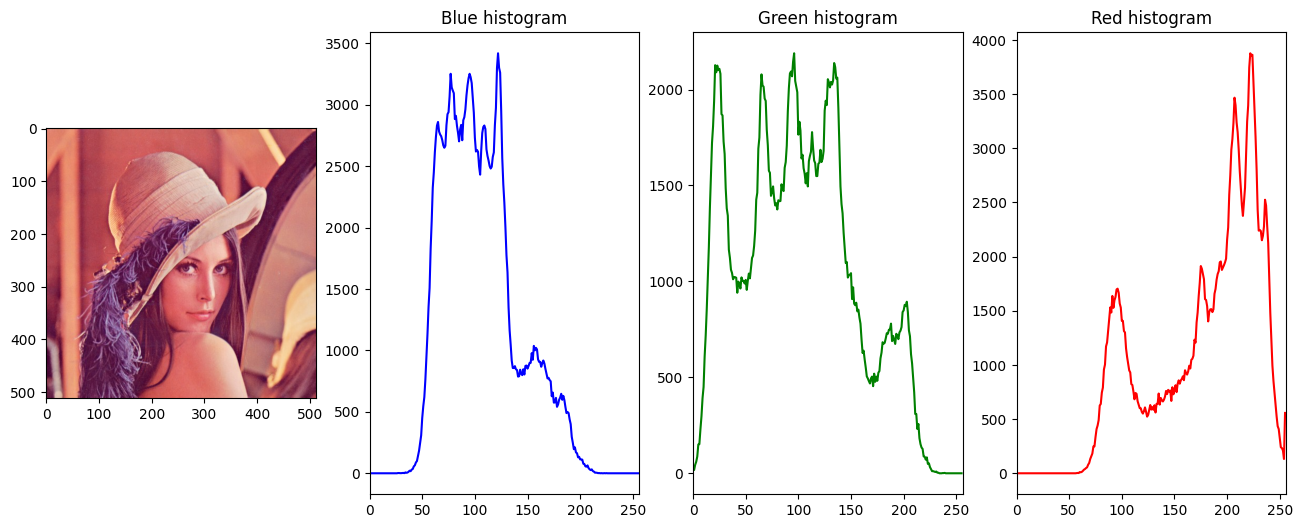

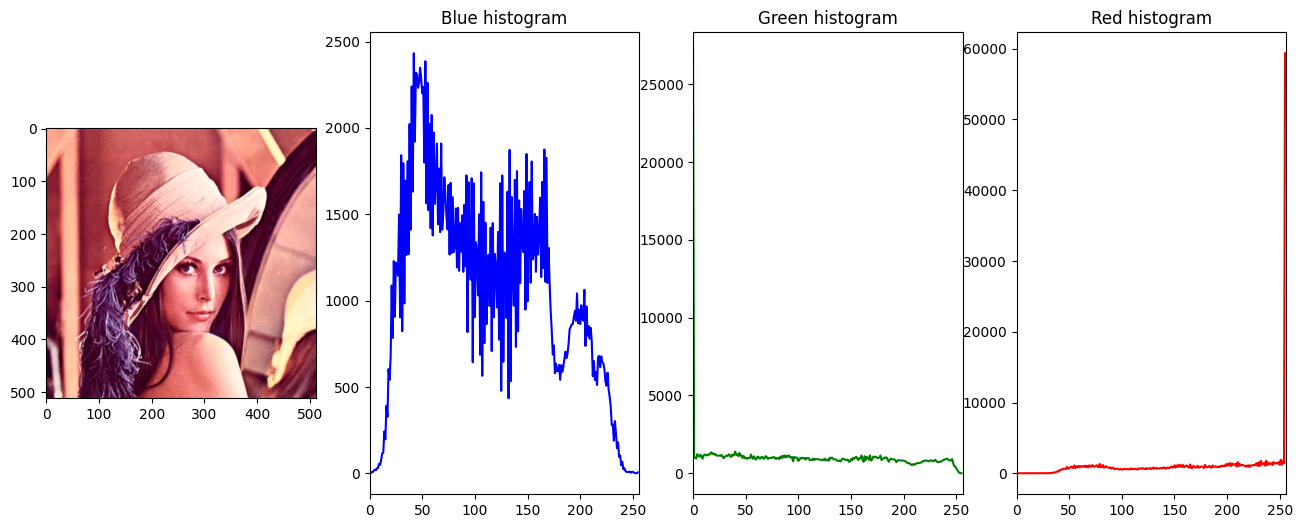

In [32]:
# jak rozciąganie, ale bazowane na dystrybuantach? 

def lut_histogram_equalization(D, D_0_index, k):
    return ((D - D[D_0_index]) / (1 - D[D_0_index])) * (k - 1)

def equalize_image_histogram(image):
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    Y = ycbcr_image[:,:,0]
    
    hist, _ = np.histogram(Y.flatten(), 256, (0, 256))
    distribution = hist.cumsum()
    distribution_normalized = distribution / distribution.max()
    
    D_0_index = np.where(distribution_normalized > 0)[0][0]
    k = 256
    
    lut = lut_histogram_equalization(distribution_normalized, D_0_index, k)
    lut = lut.astype(np.uint8)
    
    # for each pixel value in Y channel gets a new value from the lookup table
    Y = lut[Y]
    
    ycbcr_image[:,:,0] = Y
    return cv2.cvtColor(ycbcr_image, cv2.COLOR_YCrCb2BGR)

lena_512 = cv2.imread('./img/LENA_512.jpg')
equalized_histogram_lena = equalize_image_histogram(lena_512)

color_histogram(lena)
color_histogram(equalized_histogram_lena)

cv2.imshow("lena", lena)
cv2.imshow("equalized histogram lena", equalized_histogram_lena)

cv2.waitKey(50)
cv2.destroyAllWindows()

# Zadanie 5 (2 punkty)

Proszę zastosować do zdjęcia "kobieta.jpg":

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/kobieta.jpg)

  * Rozciągnięcie histogramu
  * Wyrównywanie histogramu

Uwagi:

  * Przed wykonaniem powyższych operacji narysuj histogram i usuń piki odpowiadające wartością skrajnym (tak by móc rozciągnąć histogram)
  * Proszę wykonać na zdjęciu w odcieniach szarości i RGB. 


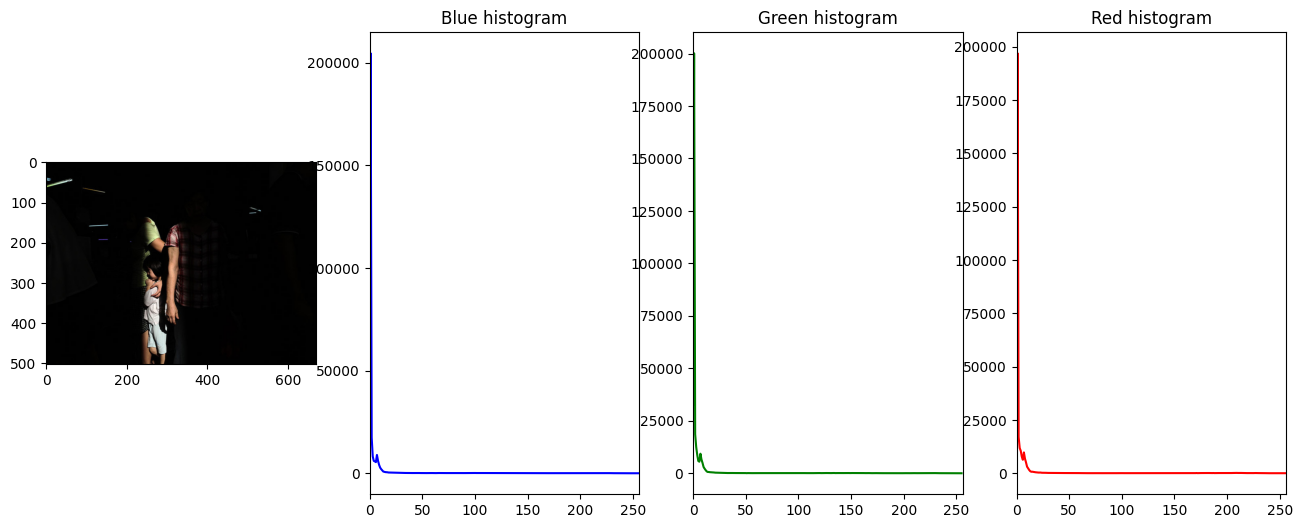

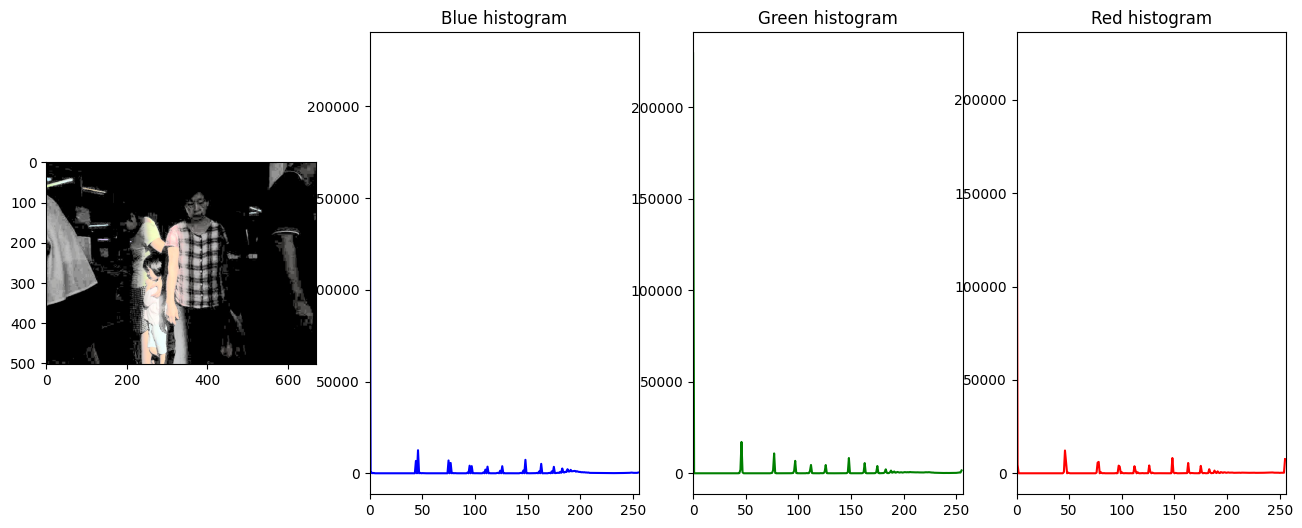

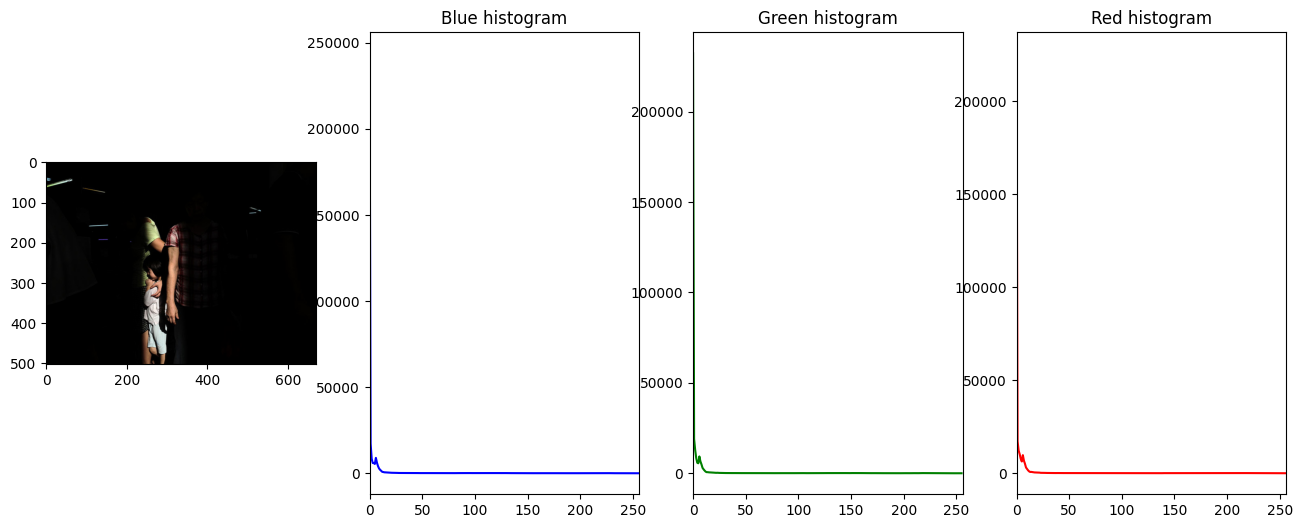

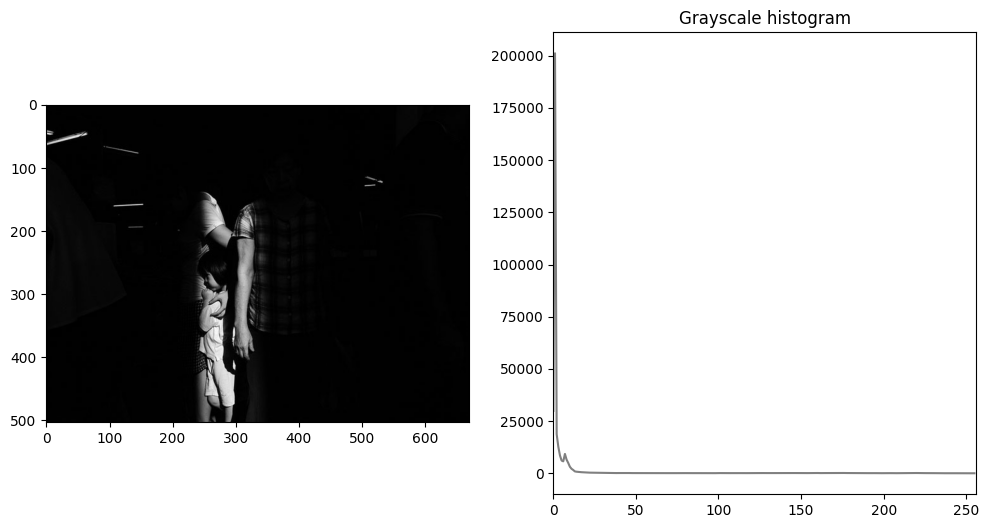

In [44]:
kobieta = cv2.imread("./img/kobieta.jpg", cv2.IMREAD_COLOR)
kobieta_gray = cv2.imread('./img/kobieta.jpg', cv2.IMREAD_GRAYSCALE)

lower_bound, upper_bound = 1, 255

clipped_kobieta = np.clip(kobieta, lower_bound, upper_bound)
clipped_kobieta_gray = np.clip(kobieta_gray, lower_bound, upper_bound)

equalized_kobieta = equalize_image_histogram(clipped_kobieta)
stretched_kobieta = stretch_image_histogram(clipped_kobieta)
color_comparison = np.concatenate((clipped_kobieta, equalized_kobieta, stretched_kobieta), axis=1)
cv2.imshow("original / equalized / stretched", color_comparison)

# dla szarego obrazka chyba nie zadziała, funkcje działają bazując na zamianie z BGR na YCrCb
# equalized_kobieta_gray = equalize_image_histogram(kobieta_gray)
# stretched_kobieta_gray = stretch_image_histogram(kobieta_gray)

color_histogram(kobieta)
color_histogram(equalized_kobieta)
color_histogram(stretched_kobieta)

grayscale_histogram(kobieta_gray)
# grayscale_histogram(equalized_kobieta_gray)
# grayscale_histogram(stretched_kobieta_gray)

cv2.waitKey(50)
cv2.destroyAllWindows()